# Final Preprocessing Pipeline for Enhanced IDS Dataset
### Supporting Praxis Research: *Leveraging AutoML for Advanced Network Traffic Analysis and Intrusion Detection by Enhancing Security with a Multi-Feature IDS Dataset*

**Author:** [Your Full Name], Doctoral Candidate, George Washington University  
**Date:** March 14, 2025  

**Purpose:**  
This script performs the final preprocessing of the enhanced IDS dataset used in the praxis study. It includes merging multiple subsets, data cleaning, feature selection, and formatting for input into AutoML frameworks. The goal is to prepare a high-quality, balanced, and multi-feature dataset optimized for intrusion detection model training and evaluation.

**License:** MIT License  
Released under the MIT License. You are free to use, modify, and distribute this code with appropriate credit. Refer to the accompanying `LICENSE` file for full details.

In [1]:
# Importing libraries for Data cleaning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import s3fs
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


## Merging all CSV Files into One CSV for Preprocessing

> All dataset CSV files were uploaded to s3 and will be read from s3 

In [ ]:
# s3 filesyste
fs = s3fs.S3FileSystem()

#  S3 paths
source_path = 's3://final-praxis/Dataset/input_path/*.csv'
output_path = 's3://final-praxis/Dataset/output-merged/merged.csv'

# list of all CSV files in the source path
csv_files = fs.glob(source_path)
print("CSV files found:", csv_files)

# CSV file  read into a DataFrame
merging_dataframes = []
for csvfile in csv_files:
    try:
        print("Reading file:", csvfile)
        df_csv = pd.read_csv(f"s3://{csvfile}", header=0)
        merging_dataframes.append(df_csv)
    except Exception as e:
        print(f"Error reading {csvfile}: {e}")

# Merge all DataFrames into one
merged_df = pd.concat(merging_dataframes, ignore_index=True)
print("Merged DataFrame shape:", merged_df.shape)

# the merged DataFrame to CSV and upload to S3
with fs.open(output_path, 'w') as f:
    merged_df.to_csv(f, index=False)
print("Merged CSV uploaded to:", output_path)

# the merged CSV read 
new_df = pd.read_csv(output_path)
print("New DataFrame shape:", new_df.shape)

#  merged df
print(new_df.head())

CSV files found: ['final-praxis/Dataset/input_path/Friday-02-03-2018.csv', 'final-praxis/Dataset/input_path/Friday-16-02-2018.csv', 'final-praxis/Dataset/input_path/Friday-23-02-2018.csv', 'final-praxis/Dataset/input_path/Thursday-01-03-2018.csv', 'final-praxis/Dataset/input_path/Thursday-15-02-2018.csv', 'final-praxis/Dataset/input_path/Thursday-22-02-2018.csv', 'final-praxis/Dataset/input_path/Tuesday-20-02-2018.csv', 'final-praxis/Dataset/input_path/Wednesday-14-02-2018.csv', 'final-praxis/Dataset/input_path/Wednesday-21-02-2018.csv', 'final-praxis/Dataset/input_path/Wednesday-28-02-2018.csv']
Reading file: final-praxis/Dataset/input_path/Friday-02-03-2018.csv
Reading file: final-praxis/Dataset/input_path/Friday-16-02-2018.csv
Reading file: final-praxis/Dataset/input_path/Friday-23-02-2018.csv
Reading file: final-praxis/Dataset/input_path/Thursday-01-03-2018.csv
Reading file: final-praxis/Dataset/input_path/Thursday-15-02-2018.csv
Reading file: final-praxis/Dataset/input_path/Thursd

# Reading the merged file

In [7]:
merged_df.head()

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,172.31.66.5-72.21.91.29-49690-80-6,172.31.66.5,49690,72.21.91.29,80,6,2018-03-02 12:47:05.189575,116659398,17,...,11264,9698181.5,1.022854e+06,10004184,6451005,-1,-1,116659398,BENIGN,-1
1,2,172.31.66.5-54.192.16.165-49685-443-6,172.31.66.5,49685,54.192.16.165,443,6,2018-03-02 12:47:03.395301,117286103,52,...,74040,58407106.5,6.435768e+05,58862184,57952029,-1,-1,117286103,BENIGN,-1
2,3,172.31.66.5-52.179.17.38-123-123-17,172.31.66.5,123,52.179.17.38,123,17,2018-03-02 12:47:45.823759,64032780,2,...,18485,63995700.0,0.000000e+00,63995700,63995700,-1,-1,0,BENIGN,-1
3,4,172.31.66.5-13.89.187.212-49671-443-6,172.31.66.5,49671,13.89.187.212,443,6,2018-03-02 12:47:41.542805,118622137,6,...,76978,59194738.0,1.048959e+06,59936464,58453012,-1,-1,118622137,BENIGN,-1
4,5,172.31.66.5-65.55.44.108-49718-443-6,172.31.66.5,49718,65.55.44.108,443,6,2018-03-02 12:49:36.999592,149794,7,...,0,0.0,0.000000e+00,0,0,-1,-1,149794,BENIGN,-1


## Reading the large 33.8GB CSV merged file for data preprocessing

In [2]:
output_path = 's3://final-praxis/Dataset/output-merged/merged.csv'

new_df = pd.read_csv(output_path)

### Checking shape

In [3]:
data_shape = new_df.shape

print("Data Shape of Dataset:\n")

print(data_shape)

Data Shape of Dataset:

(63195145, 91)


In [4]:
# previewing the info of the merged dataset
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63195145 entries, 0 to 63195144
Data columns (total 91 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   Flow ID                     object 
 2   Src IP                      object 
 3   Src Port                    int64  
 4   Dst IP                      object 
 5   Dst Port                    int64  
 6   Protocol                    int64  
 7   Timestamp                   object 
 8   Flow Duration               int64  
 9   Total Fwd Packet            int64  
 10  Total Bwd packets           int64  
 11  Total Length of Fwd Packet  int64  
 12  Total Length of Bwd Packet  int64  
 13  Fwd Packet Length Max       int64  
 14  Fwd Packet Length Min       int64  
 15  Fwd Packet Length Mean      float64
 16  Fwd Packet Length Std       float64
 17  Bwd Packet Length Max       int64  
 18  Bwd Packet Length Min       int64  
 19  Bwd Packet Length M

In [5]:
# decriptiong of dataset
new_df.describe()

,id,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Attempted Category
count,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,...,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07,6.319514e+07
mean,3.182939e+06,5.235040e+04,9.263601e+02,1.032882e+01,1.774877e+07,1.192889e+01,9.565598e+00,1.190107e+03,6.794183e+03,2.980549e+02,...,3.995006e+05,2.865086e+05,8.787746e+06,6.410530e+05,9.266251e+06,8.262447e+06,-9.968639e-01,-9.852102e-01,1.539909e+08,-9.901131e-01
std,1.864739e+06,1.154607e+04,1.941419e+03,5.397973e+00,3.664282e+07,7.734786e+02,1.982983e+02,5.038048e+04,2.825731e+05,9.251312e+02,...,1.869124e+06,1.477360e+06,2.221364e+07,4.283441e+06,2.288855e+07,2.198389e+07,1.333363e-01,3.708142e-01,1.599015e+09,1.444780e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.579879e+06,5.059100e+04,5.300000e+01,6.000000e+00,1.338000e+03,1.000000e+00,1.000000e+00,4.100000e+01,7.900000e+01,3.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
50%,3.159758e+06,5.341500e+04,8.000000e+01,6.000000e+00,1.369280e+05,5.000000e+00,4.000000e+00,9.700000e+01,2.260000e+02,7.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.498680e+05,-1.000000e+00
75%,4.739636e+06,5.888300e+04,4.450000e+02,1.700000e+01,4.714850e+06,9.000000e+00,7.000000e+00,1.036000e+03,1.581000e+03,5.170000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,6.172511e+06,-1.000000e+00
max,7.390266e+06,6.553500e+04,6.553500e+04,1.700000e+01,1.200000e+08,3.096290e+05,1.450260e+05,5.422964e+07,2.117032e+08,6.497200e+04,...,1.148689e+08,1.148689e+08,1.200000e+08,7.697892e+07,1.200000e+08,1.200000e+08,1.300000e+01,1.300000e+01,8.276232e+10,6.000000e+00


In [6]:
# reviewing the attack types in the dataset
new_df['Label'].value_counts()

BENIGN                                          59353486
DoS Hulk                                         1803160
DDoS-HOIC                                        1082293
FTP-BruteForce - Attempted                        298874
DDoS-LOIC-HTTP                                    289328
Botnet Ares                                       142921
SSH-BruteForce                                     94197
Infiltration - NMAP Portscan                       89374
DoS GoldenEye                                      22560
DoS Slowloris                                       8490
DoS GoldenEye - Attempted                           4301
DDoS-LOIC-UDP                                       2527
DoS Slowloris - Attempted                           2280
Botnet Ares - Attempted                              262
DDoS-LOIC-UDP - Attempted                            251
Infiltration - Communication Victim Attacker         204
Web Attack - Brute Force - Attempted                 137
Web Attack - Brute Force       

> Multiple attempted attacks which may have been benign but not actual attack. 
According to the published paper

> As discussed in our paper, we opted to use the "Attempted" label for an attack (e.g. DoS GoldenEye - Attempted) whenever a flow that was intended to be part of the attack does not exhibit any malicious behaviour. Researchers are free to decide for themselves whether they want to combine the "Attempted" flows into the actual attack label, as this will depend heavily on the flow preprocessing method that is applied. When in doubt, we recommend to relabel all "Attempted" flows as Benign (the easiest way to do this is to look at all flows where the "Attempted Category" feature is different from -1)


> Following this findings, in this praxis I will drop all attempted traffic to avoid integrity issues

# Data Cleaning

In [ ]:
# reading data from saved data
data_df = new_df

In [8]:
data_df.columns # to see all the columns

Index(['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length

In [9]:
data_df.head()

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,172.31.66.5-72.21.91.29-49690-80-6,172.31.66.5,49690,72.21.91.29,80,6,2018-03-02 12:47:05.189575,116659398,17,...,11264,9698181.5,1.022854e+06,10004184,6451005,-1,-1,116659398,BENIGN,-1
1,2,172.31.66.5-54.192.16.165-49685-443-6,172.31.66.5,49685,54.192.16.165,443,6,2018-03-02 12:47:03.395301,117286103,52,...,74040,58407106.5,6.435768e+05,58862184,57952029,-1,-1,117286103,BENIGN,-1
2,3,172.31.66.5-52.179.17.38-123-123-17,172.31.66.5,123,52.179.17.38,123,17,2018-03-02 12:47:45.823759,64032780,2,...,18485,63995700.0,0.000000e+00,63995700,63995700,-1,-1,0,BENIGN,-1
3,4,172.31.66.5-13.89.187.212-49671-443-6,172.31.66.5,49671,13.89.187.212,443,6,2018-03-02 12:47:41.542805,118622137,6,...,76978,59194738.0,1.048959e+06,59936464,58453012,-1,-1,118622137,BENIGN,-1
4,5,172.31.66.5-65.55.44.108-49718-443-6,172.31.66.5,49718,65.55.44.108,443,6,2018-03-02 12:49:36.999592,149794,7,...,0,0.0,0.000000e+00,0,0,-1,-1,149794,BENIGN,-1


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63195145 entries, 0 to 63195144
Data columns (total 91 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   Flow ID                     object 
 2   Src IP                      object 
 3   Src Port                    int64  
 4   Dst IP                      object 
 5   Dst Port                    int64  
 6   Protocol                    int64  
 7   Timestamp                   object 
 8   Flow Duration               int64  
 9   Total Fwd Packet            int64  
 10  Total Bwd packets           int64  
 11  Total Length of Fwd Packet  int64  
 12  Total Length of Bwd Packet  int64  
 13  Fwd Packet Length Max       int64  
 14  Fwd Packet Length Min       int64  
 15  Fwd Packet Length Mean      float64
 16  Fwd Packet Length Std       float64
 17  Bwd Packet Length Max       int64  
 18  Bwd Packet Length Min       int64  
 19  Bwd Packet Length M

## Handling infinity and Nan

In [11]:
# Replacing infinity values with NaN to standardize for counting in the dataset
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Counting the total number of NaN values and their columns
total_nan_values = data_df.isna().sum().sum()
columns_with_nan = data_df.isna().sum()
columns_with_nan = columns_with_nan[columns_with_nan > 0]

# Printing the results
print(f"Total number of NaN or Infinity values: {total_nan_values}\n")
print("Columns with NaN or Infinity values and their respective counts:")
print(columns_with_nan)

Total number of NaN or Infinity values: 114

Columns with NaN or Infinity values and their respective counts:
Flow Bytes/s      57
Flow Packets/s    57
dtype: int64


In [12]:
data_shape = data_df.shape

print("Data Shape before cleaning Nan\n")

print(data_shape)

Data Shape before cleaning Nan

(63195145, 91)


In [13]:
# Drop rows that contain any NaN values
data_df.dropna(inplace=True)

#  Verify that no NaN remain
print("NaN count after cleaning:", data_df.isna().sum().sum())

NaN count after cleaning: 0


In [14]:
data_shape = data_df.shape

print("Data Shape after dropping Nan\n")

print(data_shape)

Data Shape after dropping Nan

(63195088, 91)


In [15]:
data_df['Label'].value_counts()

BENIGN                                          59353429
DoS Hulk                                         1803160
DDoS-HOIC                                        1082293
FTP-BruteForce - Attempted                        298874
DDoS-LOIC-HTTP                                    289328
Botnet Ares                                       142921
SSH-BruteForce                                     94197
Infiltration - NMAP Portscan                       89374
DoS GoldenEye                                      22560
DoS Slowloris                                       8490
DoS GoldenEye - Attempted                           4301
DDoS-LOIC-UDP                                       2527
DoS Slowloris - Attempted                           2280
Botnet Ares - Attempted                              262
DDoS-LOIC-UDP - Attempted                            251
Infiltration - Communication Victim Attacker         204
Web Attack - Brute Force - Attempted                 137
Web Attack - Brute Force       

## Reviewing the Attempted Traffic

In [16]:
label_counts = data_df['Label'].value_counts()

# Filter labels that contain the substring "Attempted" and sum their counts
attempted_sum = label_counts[label_counts.index.str.contains('Attempted')].sum()

print("Sum of all 'Attempted' Labels:", attempted_sum)

Sum of all 'Attempted' Labels: 306237


> About 306230 datapoint were attempted attacks but did not happen or was not successful, or was closed and server never responded, Will be dropped



> Although the flows of attempted attacks have malicious intents,they don't have anomaly effect on the system due to the following reasons 3:

    # Category 0 - No payload sent by attacker
    # Category 1 - Port/System closed
    # Category 2 - Attack Startup/Teardown Artefact
    # Category 3 - No malicious payload
    # Category 4 - Attack Artefact
    # Category 5 - Attack Implemented Incorrectly
    # Category 6 - Target System Unresponsive
    
    > For these kinds of attempted labels, we have a choice to treat them as benign or malicious.

    In most cases of network intrusion detection, we process each flow separately, so the classifier can only see only flow at a time and doesn't know the context.

    
> I will be dropping all the Attempted traffic

## Dropping columns that will not impact or improve  IDS Models. 
> I want the model to be well versed and generalized instead of learning custom or specific patterns like IDs, IP and sour ports

In [17]:
# Droping 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port','Timestamp', columns as they will not help our performance and can introduce biases. 
# IP and Port features introduce noise and make model not generalized as the IP and port can be obsufcated or spoofed in real attack
columns_to_drop = ['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port','Timestamp']


In [18]:
# Droping the Columns
data_df = data_df.drop(columns=columns_to_drop, errors='ignore')

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63195088 entries, 0 to 63195144
Data columns (total 84 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min       

In [ ]:
data_shape = data_df.shape

print("Data Shape after dropping Columns that will not improve our models\n")

print(data_shape)

Data Shape after dropping Columns that will not improve our models

(63195088, 84)


# Checking Zero variance on the dataset

In [21]:
# Calculate variance for each column
variance = data_df.var()

# Identify zero-variance columns
zero_variance_columns = variance[variance == 0].index.tolist()

print("Zero-Variance Columns:", zero_variance_columns)

Zero-Variance Columns: ['Bwd URG Flags']


> Bwd URG Flags feature is not variable and has only 0 value. droppping this as it will be a noise in our dataset

In [22]:
# Drop zero-variance columns
data_df = data_df.drop(columns=zero_variance_columns)

In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63195088 entries, 0 to 63195144
Data columns (total 83 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min       

In [24]:
data_shape = data_df.shape

print("Data Shape after dropping Columns with zero variance\n")

print(data_shape)

Data Shape after dropping Columns with zero variance

(63195088, 83)


In [25]:
# Renaming the BENIGN Label to only first capital for consistency Benign

data_df.loc[data_df['Label'] == 'BENIGN', 'Label'] = 'Benign'


In [26]:
# confirming the Label BENIGN to Benign
print(data_df['Label'].value_counts())

Benign                                          59353429
DoS Hulk                                         1803160
DDoS-HOIC                                        1082293
FTP-BruteForce - Attempted                        298874
DDoS-LOIC-HTTP                                    289328
Botnet Ares                                       142921
SSH-BruteForce                                     94197
Infiltration - NMAP Portscan                       89374
DoS GoldenEye                                      22560
DoS Slowloris                                       8490
DoS GoldenEye - Attempted                           4301
DDoS-LOIC-UDP                                       2527
DoS Slowloris - Attempted                           2280
Botnet Ares - Attempted                              262
DDoS-LOIC-UDP - Attempted                            251
Infiltration - Communication Victim Attacker         204
Web Attack - Brute Force - Attempted                 137
Web Attack - Brute Force       

In [27]:
# Count how attemped again and note how many rows will be dropped
count_attempted = data_df[data_df['Attempted Category'] != -1].shape[0]
print("Number of attempted attack rows that will be dropped:", count_attempted)

Number of attempted attack rows that will be dropped: 306237


## Checking Attempted traffic and Dropping them

In [ ]:
# Count how many rows will be dropped
to_be_dropped_df = data_df[data_df['Attempted Category'] != -1]
count_attempted = to_be_dropped_df.shape[0]
print("Number of rows that will be dropped:", count_attempted)

# Previewing rows 
print("Preview of rows to be dropped:")
to_be_dropped_df.head(5)

Number of rows that will be dropped: 306237
Preview of rows to be dropped:


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
3664312,6,537,1,1,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0,0,-1,-1,537,Botnet Ares - Attempted,0
3664313,6,434,1,1,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0,0,-1,-1,434,Botnet Ares - Attempted,0
3673309,6,539,1,1,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0,0,-1,-1,539,Botnet Ares - Attempted,0
3690544,6,459,1,1,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0,0,-1,-1,459,Botnet Ares - Attempted,0
3690545,6,476,1,1,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0,0,-1,-1,476,Botnet Ares - Attempted,0


In [29]:
# Dropping all attempted traffic. Keeping only rows where Attempted Category == -1.
data_df = data_df[data_df['Attempted Category'] == -1]

In [ ]:
# Getting the value counts for each label in the 'Label' column
label_value_counts = data_df['Label'].value_counts()

# Preparing the value counts in a DataFrame for better presentation
label_counts_summary = pd.DataFrame({
    'Label': label_value_counts.index,
    'Count': label_value_counts.values
})
print(label_counts_summary)

                                           Label     Count
0                                         Benign  59353429
1                                       DoS Hulk   1803160
2                                      DDoS-HOIC   1082293
3                                 DDoS-LOIC-HTTP    289328
4                                    Botnet Ares    142921
5                                 SSH-BruteForce     94197
6                   Infiltration - NMAP Portscan     89374
7                                  DoS GoldenEye     22560
8                                  DoS Slowloris      8490
9                                  DDoS-LOIC-UDP      2527
10  Infiltration - Communication Victim Attacker       204
11                      Web Attack - Brute Force       131
12                              Web Attack - XSS       113
13               Infiltration - Dropbox Download        85
14                              Web Attack - SQL        39


# Attack Scoping

> For this praxis doctoral experiment, I scoped down the attack by removing the following attack types 
    "Web Attack - SQL",
    "Infiltration - Communication Victim Attacker",
    "Infiltration - NMAP Portscan",
    "Infiltration - Dropbox Download"

> They will not be considered for our training due to issues on the Labels and low representation on the dataset.

> According to the authors of the The Infiltration attack consists of 3 components:
- Dropbox Download: The authors did not provide additional information about this attack, but we assume that some kind of malicious file was downloaded by the victim through Dropbox.
- NMAP Portscan: The infected victim executes portscans on the inside network.
- Communication victim - attacker: Reports of the portscan are sent to the attacker by the victim.

> This attack saw significant label corruption on both days, to the point that it was largely impossible to reverse-engineer the original labelling logic. We based our investigation on the IPs of the victim and attacker in order to devise a new labelling logic. Given the 3 very different components of this attack, we decided to split the label in 3, labelling each flow in accordance with the component of the Infiltration attack that it belongs to. Future researchers making use of this dataset are free to decide whether they want to keep the labelling this way, or merge all 3 Infiltration components under a single label.

In [31]:
# scoping down the attack types for this praxis
labels_to_drop = [
    "Web Attack - SQL",
    "Infiltration - Communication Victim Attacker",
    "Infiltration - NMAP Portscan",
    "Infiltration - Dropbox Download"
]

In [32]:
# Filter the DataFrame to drop rows with these labels
data_df_filtered = data_df[~data_df["Label"].isin(labels_to_drop)]

In [33]:
data_df_filtered.shape

(62799149, 83)

In [34]:
# Get the value counts for each label in the 'Label' column
label_value_counts = data_df_filtered['Label'].value_counts()

# Prepare the value counts in a DataFrame for better presentation
label_counts_summary = pd.DataFrame({
    'Label': label_value_counts.index,
    'Count': label_value_counts.values
})
print(label_counts_summary)

                       Label     Count
0                     Benign  59353429
1                   DoS Hulk   1803160
2                  DDoS-HOIC   1082293
3             DDoS-LOIC-HTTP    289328
4                Botnet Ares    142921
5             SSH-BruteForce     94197
6              DoS GoldenEye     22560
7              DoS Slowloris      8490
8              DDoS-LOIC-UDP      2527
9   Web Attack - Brute Force       131
10          Web Attack - XSS       113


# Further Cleaning of Dataset and preprocessing

In [35]:
cleaned_df = data_df_filtered

In [36]:
# Checking through our cleaned dataset
cleaned_df.head(10)

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,6,116659398,17,16,883,1576,436,0,51.941176,144.555124,...,11264,9698181.5,1.022854e+06,10004184,6451005,-1,-1,116659398,Benign,-1
1,6,117286103,52,85,1022,108153,250,0,19.653846,55.105562,...,74040,58407106.5,6.435768e+05,58862184,57952029,-1,-1,117286103,Benign,-1
2,17,64032780,2,2,96,96,48,48,48.000000,0.000000,...,18485,63995700.0,0.000000e+00,63995700,63995700,-1,-1,0,Benign,-1
3,6,118622137,6,3,216,372,72,0,36.000000,39.436024,...,76978,59194738.0,1.048959e+06,59936464,58453012,-1,-1,118622137,Benign,-1
4,6,149794,7,6,1088,3852,785,0,155.428571,288.636944,...,0,0.0,0.000000e+00,0,0,-1,-1,149794,Benign,-1
5,17,64032596,2,2,96,96,48,48,48.000000,0.000000,...,18449,63995759.0,0.000000e+00,63995759,63995759,-1,-1,0,Benign,-1
6,6,119999500,5,3,218,374,73,0,43.600000,39.803266,...,76607,59898016.5,5.435035e+04,59936448,59859585,-1,-1,298558110,Benign,-1
7,17,119455442,2,0,402,0,201,201,201.000000,0.000000,...,0,119455442.0,0.000000e+00,119455442,119455442,-1,-1,0,Benign,-1
8,17,64033078,2,2,96,96,48,48,48.000000,0.000000,...,18609,63995817.0,0.000000e+00,63995817,63995817,-1,-1,0,Benign,-1
9,6,119999535,4,2,145,250,73,0,36.250000,41.859885,...,77829,59936435.5,4.879037e+01,59936470,59936401,-1,-1,418586500,Benign,-1


In [37]:
# Dropping Attempted Category column
drop_col = ['Attempted Category']
cleaned_df= cleaned_df.drop(columns=drop_col, errors='ignore')


In [38]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62799149 entries, 0 to 63195144
Data columns (total 82 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min       

In [39]:
cleaned_df.shape

(62799149, 82)

In [40]:
#Reviewing the Protocol Feature that ascertain value points and variarity
cleaned_df['Protocol'].value_counts()

6     37657029
17    24958770
1       105540
0        77810
Name: Protocol, dtype: int64

In [41]:
# Getting the value counts for each data value in the 'Protocol' column
protocol_value_counts = cleaned_df['Protocol'].value_counts()

# Prepare the value counts in a DataFrame for better presentation
protocol_counts_summary = pd.DataFrame({
    'Protocol': protocol_value_counts.index,
    'Count': protocol_value_counts.values
})
print(protocol_counts_summary)

   Protocol     Count
0         6  37657029
1        17  24958770
2         1    105540
3         0     77810


In [ ]:
# dictionary mapping protocol numbers to label & description
protocol_dict = {
    0:  {"Label": "HOPOPT", "Description": "IPv6 Hop-by-Hop Option"},
    1:  {"Label": "ICMP",   "Description": "Internet Control Message Protocol"},
    2:  {"Label": "IGMP",   "Description": "Internet Group Management Protocol"},
    6:  {"Label": "TCP",    "Description": "Transmission Control Protocol"},
    17: {"Label": "UDP",    "Description": "User Datagram Protocol"}
}

def map_protocol_label(protocol_num):
    """Return the protocol label from the dictionary or 'Unknown' if not found."""
    return protocol_dict.get(protocol_num, {}).get("Label", "Unknown")

def map_protocol_desc(protocol_num):
    """Return the protocol description from the dictionary or 'N/A' if not found."""
    return protocol_dict.get(protocol_num, {}).get("Description", "N/A")

# Getting the value counts for each data value in the 'Protocol' column
protocol_value_counts = cleaned_df['Protocol'].value_counts()

# Prepare the value counts in a DataFrame for better presentation
protocol_counts_summary = pd.DataFrame({
    'Protocol Number': protocol_value_counts.index,
    'Count': protocol_value_counts.values
})

# Map each protocol number to a label and description
protocol_counts_summary['Protocol Label'] = protocol_counts_summary['Protocol Number'].map(map_protocol_label)
protocol_counts_summary['Description'] = protocol_counts_summary['Protocol Number'].map(map_protocol_desc)

print(protocol_counts_summary)

   Protocol Number     Count Protocol Label                        Description
0                6  37657029            TCP      Transmission Control Protocol
1               17  24958770            UDP             User Datagram Protocol
2                1    105540           ICMP  Internet Control Message Protocol
3                0     77810         HOPOPT             IPv6 Hop-by-Hop Option


#### checking missing or null data

In [43]:
# checking null in the dataset
cleaned_df.isnull().sum()

Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
                             ..
Idle Min                      0
ICMP Code                     0
ICMP Type                     0
Total TCP Flow Time           0
Label                         0
Length: 82, dtype: int64

> There are no null value in the dataset.

In [43]:
# Droping columns that contain all zeros. definintely not gonna be useful to us
# Identify columns with all zero values and drop them
#all_zero_columns = [col for col in cleaned_df.columns if (cleaned_df[col].dtype in ['int64', 'float64']) and (cleaned_df[col].sum() == 0)]


In [44]:
# print(all_zero_columns)

[]


> Confirmed no column has onnly zeroes on the dataset/ we have previously dropped the culprit column and our dataset is still solid

In [44]:
# Identifying numeric columns in the dataset
numeric_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

# Display the numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', '

#### Handling any infinity value on our dataset.

In [45]:
# Handling infinity and Nan

# Replacing infinity values with NaN to standardize for counting in the dataset
cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Counting the total number of NaN values and their columns
total_nan_values = cleaned_df[numeric_columns].isna().sum().sum()
columns_with_nan = cleaned_df[numeric_columns].isna().sum()
columns_with_nan = columns_with_nan[columns_with_nan > 0]

# Printing the results
print(f"Total number of NaN or Infinity values in numeric columns: {total_nan_values}\n")
print("Columns with NaN or Infinity values and their respective counts:")
print(columns_with_nan)

Total number of NaN or Infinity values in numeric columns: 0

Columns with NaN or Infinity values and their respective counts:
Series([], dtype: int64)


## Reviewing the ICMP Type and Code Features

In [ ]:
# Get the value counts for each ICMP in the 'Label' column
icmp_code_value_counts = cleaned_df['ICMP Code'].value_counts()
icmp_type_value_counts = cleaned_df['ICMP Type'].value_counts()
# Prepare the value counts in a DataFrame for better presentation
icmp_code__counts_summary = pd.DataFrame({
    'ICMP Code': icmp_code_value_counts.index,
    'Count': icmp_code_value_counts.values
})

icmp_type__counts_summary = pd.DataFrame({
    'ICMP Type': icmp_type_value_counts.index,
    'Count': icmp_type_value_counts.values
})

print(icmp_code__counts_summary)
print()
print(icmp_type__counts_summary)

   ICMP Code     Count
0         -1  62693609
1          0     93689
2         10      7677
3          3      3877
4          1       227
5         13        68
6          4         2

   ICMP Type     Count
0         -1  62693609
1          8     78338
2         11     14845
3          3     11862
4          0       444
5         13        44
6          5         7


> In this data cleaning phase of our methodology, I identified that the ICMP Type and ICMP Code columns predominantly contained a placeholder value of -1, indicating non-ICMP traffic. Given that our dataset primarily comprises TCP and UDP protocols, with ICMP traffic representing a minimal fraction, these columns offered limited informational value other than ICMP properties. To enhance data quality and analytical efficiency, I elected to remove these columns. 
This decision aligns with best practices in data preprocessing, where features with low variability or relevance are excluded to streamline analysis and improve model performance. By eliminating these columns, I reduced dataset dimensionality, thereby facilitating more efficient computational processing and minimizing potential noise in subsequent analyses.
the -1 does mean non ICMP traffic which can be TCP or UDP. since there is not direct way to denote those -1 in its actual represenation. I dropped these columns to avoid misrepresentation of features in the netflow data as well as biases as the -1 datapoint is larger than actual ICMP TRAFFIC

    For comprehensive information on ICMP parameters and protocol numbers, refer to the following resources:

    Internet Assigned Numbers Authority. (n.d.). Internet Control Message Protocol (ICMP) Parameters. Retrieved from https://www.iana.org/assignments/icmp-parameters/icmp-parameters.xhtml

    IBM. (n.d.). ICMP type and code IDs. Retrieved from https://www.ibm.com/docs/en/qsip/7.4?topic=applications-icmp-type-code-ids

    Internet Assigned Numbers Authority. (n.d.). Protocol Numbers. Retrieved from https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml

    These references provide detailed insights into ICMP message types, codes, and protocol assignments, underscoring the rationale behind our data cleaning decisions.

In [ ]:
# Dropping the icmp tYPE AND Code Columns
cleaned_df = cleaned_df.drop(['ICMP Type', 'ICMP Code'], axis=1)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62799149 entries, 0 to 63195144
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min       

In [ ]:
cleaned_df.shape

(62799149, 80)

In [ ]:
# CHECKING NULL VALUES AGAIN IN DATASET
cleaned_df.isnull().sum()

Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
                             ..
Idle Std                      0
Idle Max                      0
Idle Min                      0
Total TCP Flow Time           0
Label                         0
Length: 80, dtype: int64

> From the above I have successfuly cleaned up the dataset. I need to now move forwrd with splitting the dataset

## Checking for duplicates in the datasets

In [51]:
# Find duplicate rows across all columns
duplicate_rows = cleaned_df[cleaned_df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Print the duplicate rows (optional)
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 17666498
Duplicate Rows:
          Protocol  Flow Duration  Total Fwd Packet  Total Bwd packets  \
884             17            686                 1                  1   
1066            17            720                 1                  1   
1109            17            259                 1                  1   
1226            17            686                 1                  1   
1423            17            291                 1                  1   
...            ...            ...               ...                ...   
63194977         6         105459                 2                  1   
63194989         6         105454                 2                  1   
63194998         6         105055                 2                  1   
63195030         6         104872                 2                  1   
63195120         6         105096                 2                  1   

          Total Length of Fwd Packet  Total Length of Bwd Pa

> found 17 million+ (17666498) duplicate rows out of 63 million total (~29% duplication!).
Impact: Larger dataset size, potential overfitting or bias, higher training cost.
checking the Label of the syndicate

In [52]:
# Checking Class Labels in the Duplicate Rows
duplicates_label_counts = duplicate_rows['Label'].value_counts()
print("Label distribution among duplicate rows:")
print(duplicates_label_counts)

#  checking proportions (what fraction of the duplicates each class forms)
duplicates_label_proportions = duplicates_label_counts / len(duplicate_rows)
print("\nProportion of each label among duplicate rows:")
print(duplicates_label_proportions)

#  Compare with Entire Dataset
all_label_counts = cleaned_df['Label'].value_counts()
all_label_proportions = all_label_counts / len(cleaned_df)

print("\nLabel distribution in the entire dataset:")
print(all_label_counts)
print("\nProportion of each label in the entire dataset:")
print(all_label_proportions)


Label distribution among duplicate rows:
Benign    17666498
Name: Label, dtype: int64

Proportion of each label among duplicate rows:
Benign    1.0
Name: Label, dtype: float64

Label distribution in the entire dataset:
Benign                      59353429
DoS Hulk                     1803160
DDoS-HOIC                    1082293
DDoS-LOIC-HTTP                289328
Botnet Ares                   142921
SSH-BruteForce                 94197
DoS GoldenEye                  22560
DoS Slowloris                   8490
DDoS-LOIC-UDP                   2527
Web Attack - Brute Force         131
Web Attack - XSS                 113
Name: Label, dtype: int64

Proportion of each label in the entire dataset:
Benign                      0.945131
DoS Hulk                    0.028713
DDoS-HOIC                   0.017234
DDoS-LOIC-HTTP              0.004607
Botnet Ares                 0.002276
SSH-BruteForce              0.001500
DoS GoldenEye               0.000359
DoS Slowloris               0.000135
DDo

 > Huge number of the Infiltration are duplictaed. this will reduce the minority datapoint. A million plus are benign. Will be removed as well

In [53]:
#  Removing Duplicates and Checking Distribution
df_no_duplicates = cleaned_df.drop_duplicates()
no_dup_label_counts = df_no_duplicates['Label'].value_counts()
no_dup_label_proportions = no_dup_label_counts / len(df_no_duplicates)

print("\nLabel distribution after removing duplicates:")
print(no_dup_label_counts)
print("\nProportion of each label after removing duplicates:")
print(no_dup_label_proportions)


Label distribution after removing duplicates:
Benign                      41686931
DoS Hulk                     1803160
DDoS-HOIC                    1082293
DDoS-LOIC-HTTP                289328
Botnet Ares                   142921
SSH-BruteForce                 94197
DoS GoldenEye                  22560
DoS Slowloris                   8490
DDoS-LOIC-UDP                   2527
Web Attack - Brute Force         131
Web Attack - XSS                 113
Name: Label, dtype: int64

Proportion of each label after removing duplicates:
Benign                      0.923653
DoS Hulk                    0.039952
DDoS-HOIC                   0.023980
DDoS-LOIC-HTTP              0.006411
Botnet Ares                 0.003167
SSH-BruteForce              0.002087
DoS GoldenEye               0.000500
DoS Slowloris               0.000188
DDoS-LOIC-UDP               0.000056
Web Attack - Brute Force    0.000003
Web Attack - XSS            0.000003
Name: Label, dtype: float64


> I identified a large number of duplicate rows (approximately 17+ million) in this NetFlow dataset. This included around 17.96 million duplicates for Benign (roughly 30% of all Benign records). Given that exact duplicates do not add unique information and can lead to overfitting, I decided to drop these duplicates.
		•	Benign dropped from 59.66 million rows to 41.69 million after de-duplication.
While this step significantly reduces memory usage and training overhead, it also further increases class imbalance. I will apply oversampling methods (SMOTE) on the training set to ensure sufficient minority-class representation during model training.
	Removing these duplicates also reduces dataset size, improving computational efficiency for both memory usage and training time.

### Check shape and info

In [54]:
df_no_duplicates.shape

(45132651, 80)

> Our datapoint dropped to 45 million + approx

In [55]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45132651 entries, 0 to 63195144
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min       

In [56]:
# checking Missing values
print(df_no_duplicates.isnull().sum())

Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
                             ..
Idle Std                      0
Idle Max                      0
Idle Min                      0
Total TCP Flow Time           0
Label                         0
Length: 80, dtype: int64


In [57]:
# Class distribution
print(df_no_duplicates['Label'].value_counts())

Benign                      41686931
DoS Hulk                     1803160
DDoS-HOIC                    1082293
DDoS-LOIC-HTTP                289328
Botnet Ares                   142921
SSH-BruteForce                 94197
DoS GoldenEye                  22560
DoS Slowloris                   8490
DDoS-LOIC-UDP                   2527
Web Attack - Brute Force         131
Web Attack - XSS                 113
Name: Label, dtype: int64


# Saving without Scaling

In [58]:
# Saving the cleaned dataset without standardization
data_output_path = 's3://final-praxis/Dataset/output-path/'


In [61]:
df_no_duplicates.to_csv('s3://final-praxis/Dataset/output-path/merged_cleaned_nosclaing.csv', index=False)

In [62]:
# Memory usage
print("Memory usage (MB):", df_no_duplicates.memory_usage(deep=True).sum() / (1024**2))

Memory usage (MB): 30268.791374206543


> Cli upload to S3

> aws s3 cp merged_dataset_noscaling_cleaned.csv  s3://praxis-gwu-datasets/Prxais_Dataset_Improved/Final_Cleaned_Merged/

In [63]:
mycleaned_df = df_no_duplicates

In [64]:
# Data shape and info
print("Data shape is:", mycleaned_df.shape)
mycleaned_df.info()

Data shape is: (45132651, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45132651 entries, 0 to 63195144
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                in

# Visualizing the Label distribution 

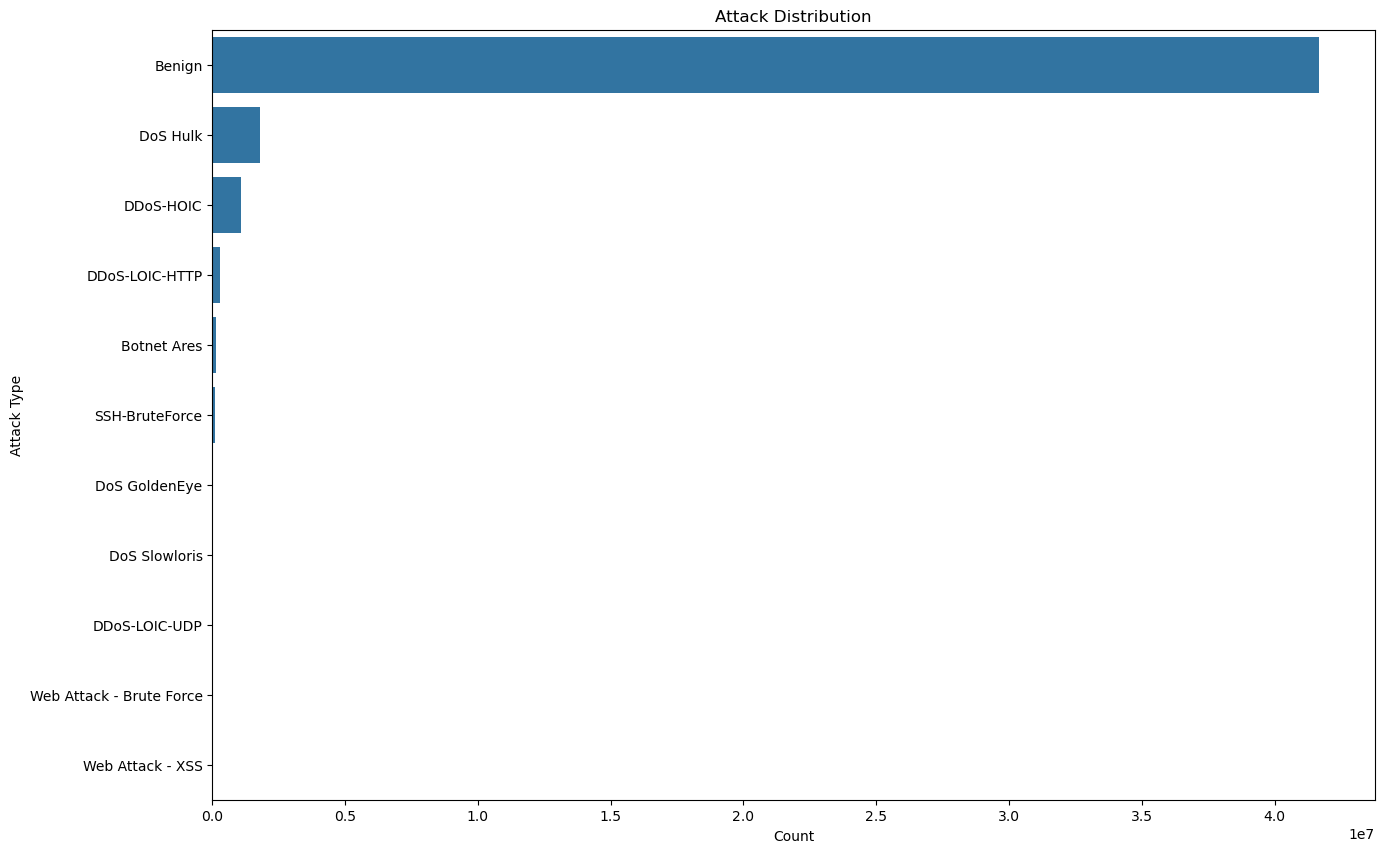

In [67]:
# the 'Label' column contains attack types
plt.figure(figsize=(15, 10))
sns.countplot(y=mycleaned_df['Label'], order=mycleaned_df['Label'].value_counts().index)
plt.title('Attack Distribution')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

In [68]:
# Class distribution
print(mycleaned_df['Label'].value_counts())

Benign                      41686931
DoS Hulk                     1803160
DDoS-HOIC                    1082293
DDoS-LOIC-HTTP                289328
Botnet Ares                   142921
SSH-BruteForce                 94197
DoS GoldenEye                  22560
DoS Slowloris                   8490
DDoS-LOIC-UDP                   2527
Web Attack - Brute Force         131
Web Attack - XSS                 113
Name: Label, dtype: int64


# Splitting DATASET into Train, Test and Validation Dataset

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [6]:
# read merged cleaned data
final_cleandf= pd.read_csv("s3://final-praxis/Dataset/output-path/merged_cleaned_nosclaing.csv", header=0)


In [32]:
final_cleandf.shape

(45132651, 80)

In [33]:
final_cleandf.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,116659398,17,16,883,1576,436,0,51.941176,144.555124,...,22492.75,26450.571732,88105,11264,9698181.5,1.022854e+06,10004184,6451005,116659398,Benign
1,6,117286103,52,85,1022,108153,250,0,19.653846,55.105562,...,204789.00,184907.009067,335538,74040,58407106.5,6.435768e+05,58862184,57952029,117286103,Benign
2,17,64032780,2,2,96,96,48,48,48.000000,0.000000,...,18485.00,0.000000,18485,18485,63995700.0,0.000000e+00,63995700,63995700,0,Benign
3,6,118622137,6,3,216,372,72,0,36.000000,39.436024,...,77407.00,606.697618,77836,76978,59194738.0,1.048959e+06,59936464,58453012,118622137,Benign
4,6,149794,7,6,1088,3852,785,0,155.428571,288.636944,...,0.00,0.000000,0,0,0.0,0.000000e+00,0,0,149794,Benign


In [34]:
# 'Label' is the target column
target_col = 'Label'

# train (80%) and temp (20%)
train, temp = train_test_split(final_cleandf, test_size=0.2, random_state=42, stratify= final_cleandf[target_col])

# validation (40% of temp => 12% of total) and test (60% of temp => 12% of total)
validation, test = train_test_split(temp, test_size=0.6, random_state=42, stratify=temp[target_col])

In [35]:
# Check the split sizes
print(f"Training set: {len(train)} samples")
print(f"Validation set: {len(validation)} samples")
print(f"Test set: {len(test)} samples")

Training set: 36106120 samples
Validation set: 3610612 samples
Test set: 5415919 samples


In [36]:
# Confirm the sizes
print("Training set shape:", train.shape)
print("Validation set shape:", validation.shape)
print("Test set shape:", test.shape)
print()

Training set shape: (36106120, 80)
Validation set shape: (3610612, 80)
Test set shape: (5415919, 80)



In [37]:
# Check class distribution in each split in raw format
print("\nTrain label distribution:")
print(train[target_col].value_counts(normalize=False))
print("\nValidation label distribution:")
print(validation[target_col].value_counts(normalize=False))
print("\nTest label distribution:")
print(test[target_col].value_counts(normalize=False))


Train label distribution:
Benign                      33349544
DoS Hulk                     1442528
DDoS-HOIC                     865834
DDoS-LOIC-HTTP                231462
Botnet Ares                   114337
SSH-BruteForce                 75358
DoS GoldenEye                  18048
DoS Slowloris                   6792
DDoS-LOIC-UDP                   2022
Web Attack - Brute Force         105
Web Attack - XSS                  90
Name: Label, dtype: int64

Validation label distribution:
Benign                      3334954
DoS Hulk                     144253
DDoS-HOIC                     86584
DDoS-LOIC-HTTP                23146
Botnet Ares                   11434
SSH-BruteForce                 7536
DoS GoldenEye                  1805
DoS Slowloris                   679
DDoS-LOIC-UDP                   202
Web Attack - Brute Force         10
Web Attack - XSS                  9
Name: Label, dtype: int64

Test label distribution:
Benign                      5002433
DoS Hulk                

In [39]:
# Saving the processed dataset
data_output_path = 's3://final-praxis/Dataset/output-path/new-processed-data'

In [40]:
validation.to_csv(f'{data_output_path}/validation.csv', index=False)

In [41]:
# test dataset
test.to_csv(f'{data_output_path}/testing.csv', index=False)

In [ ]:
# Saving each set to s3 path as CSV
train.to_csv(f'{data_output_path}/training.csv', index=False)

# Checking the Dataset 

In [43]:
test.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
28199264,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,Benign
7291106,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,0.0,0.0,0,0,0.0,0.0,0,0,170385666,Benign
24465354,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,218096,Benign
44643386,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,0.0,0.0,0,0,0.0,0.0,0,0,1033,Benign
39363604,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,0.0,0.0,0,0,0.0,0.0,0,0,4238522,Benign


In [45]:
label = test['Label']

In [46]:
# Drop the 'Label' column from the test DataFrame
test_no_label = test.drop(columns=['Label'])

In [47]:
test_no_label.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
28199264,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
7291106,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,20,0.0,0.0,0,0,0.0,0.0,0,0,170385666
24465354,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,218096
44643386,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1033
39363604,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,20,0.0,0.0,0,0,0.0,0.0,0,0,4238522


# Saving the test data with no labels 

In [49]:
# exporting test no label
test_no_label.to_csv(f'{data_output_path}/testing_no_label.csv', index=False)

In [50]:
test_no_label.to_csv(f'{data_output_path}/testing_no_label_header.csv', header=False, index=False)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36106120 entries, 40632028 to 40819062
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min

In [52]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610612 entries, 33169908 to 28823664
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min 

In [53]:
test_no_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415919 entries, 28199264 to 41858321
Data columns (total 79 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min 

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415919 entries, 28199264 to 41858321
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min 

=================================================== ## END OF PREPROCESSING ##===========================================================